# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Name : Ezgi Cuğ</h2>

# Data

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report


In [3]:
# Read csv
df_raw = pd.read_csv("diamonds.csv")
df_raw

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [5]:
df_raw.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [6]:
df_raw.isnull().sum() #Analyse missing values

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df_raw.isna().sum() #Analyse missing values

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df_raw.loc[(df_raw['x']==0) | (df_raw['y']==0) | (df_raw['z']==0)]   # Either of length, width or dept of diamonds can not be 0.

,index,carat,cut,color,clarity,depth,table,x,y,z,price
2207,2208,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,Very Low
2314,2315,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,Very Low
4791,4792,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,Very Low
5471,5472,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,Very Low
10167,10168,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,Low
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,Low
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,Low
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,Low
15951,15952,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,Low
24394,24395,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,High


In [9]:
df_raw = df_raw[(df_raw[['x','y','z']] != 0).all(axis=1)] #drop rows with 0 

# Exploratory Data Analysis

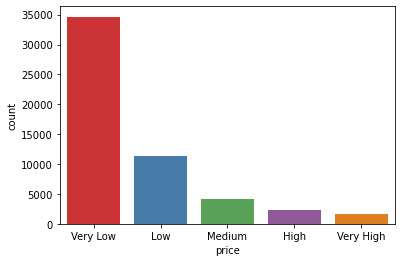

In [10]:
# Our label Distribution (countplot)
ax = sns.countplot(x="price", data=df_raw, palette="Set1")

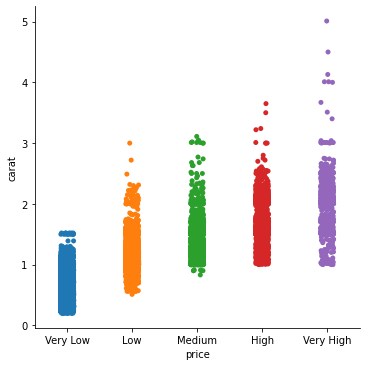

In [11]:
sns.catplot(x="price",y="carat",data=df_raw)

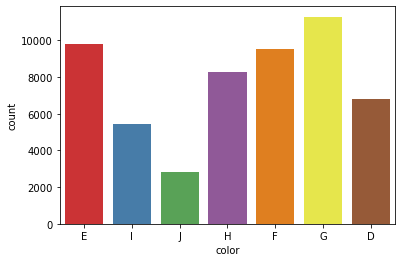

In [12]:
x = sns.countplot(x="color", data=df_raw, palette="Set1")

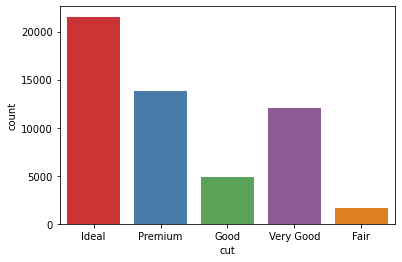

In [13]:
ax = sns.countplot(x="cut", data=df_raw, palette="Set1")

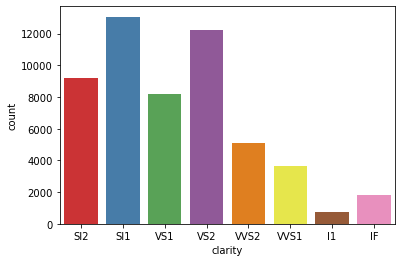

In [14]:
ax = sns.countplot(x="clarity", data=df_raw, palette="Set1")


/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

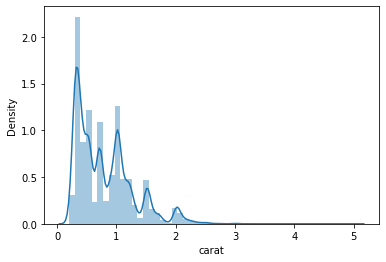

In [15]:
# Example EDA (distplot)
sns.distplot(df_raw.carat)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

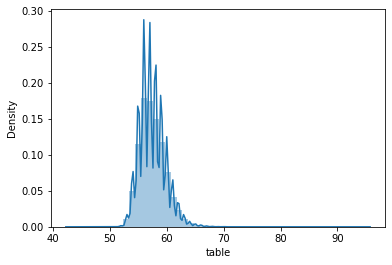

In [16]:
sns.distplot(df_raw.table)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

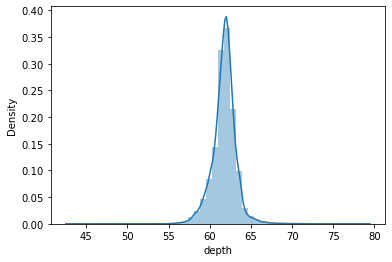

In [17]:
sns.distplot(df_raw.depth)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

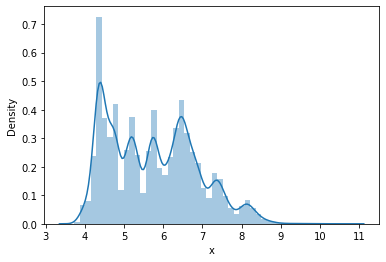

In [18]:
sns.distplot(df_raw.x)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

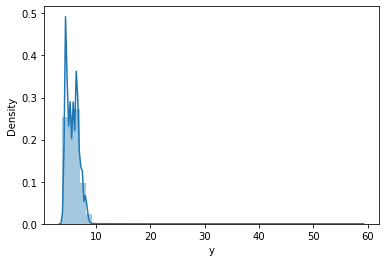

In [19]:
sns.distplot(df_raw.y)

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z', ylabel='Density'>

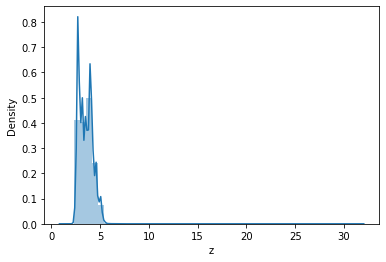

In [20]:
sns.distplot(df_raw.z)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [21]:
df_raw = df_raw.drop(["index"], axis = 1)
df_raw.duplicated().sum() # Check duplicate values 

341

In [22]:
df_raw = df_raw.drop_duplicates().reset_index(drop = True)

In [24]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw["cut"] = label_encoder.fit_transform(df_raw["cut"])
df_raw["clarity"] = label_encoder.fit_transform(df_raw["clarity"]) 
df_raw["color"] = label_encoder.fit_transform(df_raw["color"]) 
df_raw["price"] = label_encoder.fit_transform(df_raw["price"]) 
df_raw

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,4
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,4
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,4
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,4
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,4
...,...,...,...,...,...,...,...,...,...,...
53574,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,4
53575,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,4
53576,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,4
53577,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,4


(2.0, 10.0)

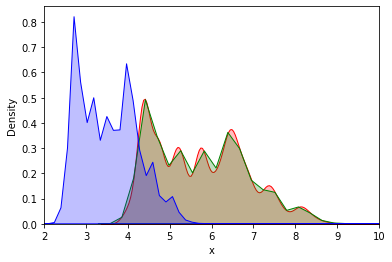

In [21]:
sns.kdeplot(df_raw['x'] ,shade=True , color='r' )
sns.kdeplot(df_raw['y'] , shade=True , color='g' )
sns.kdeplot(df_raw['z'] , shade= True , color='b')
plt.xlim(2,10)

In [27]:
df_raw['volume'] = df_raw['x']*df_raw['y']*df_raw['z']
df_raw

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,4,38.202030
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,4,34.505856
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,4,38.076885
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,4,46.724580
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,4,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53574,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,4,115.920000
53575,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,4,118.110175
53576,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,4,114.449728
53577,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,4,140.766120


In [31]:
df_raw.drop(['x','y','z'],axis=1,inplace=True)

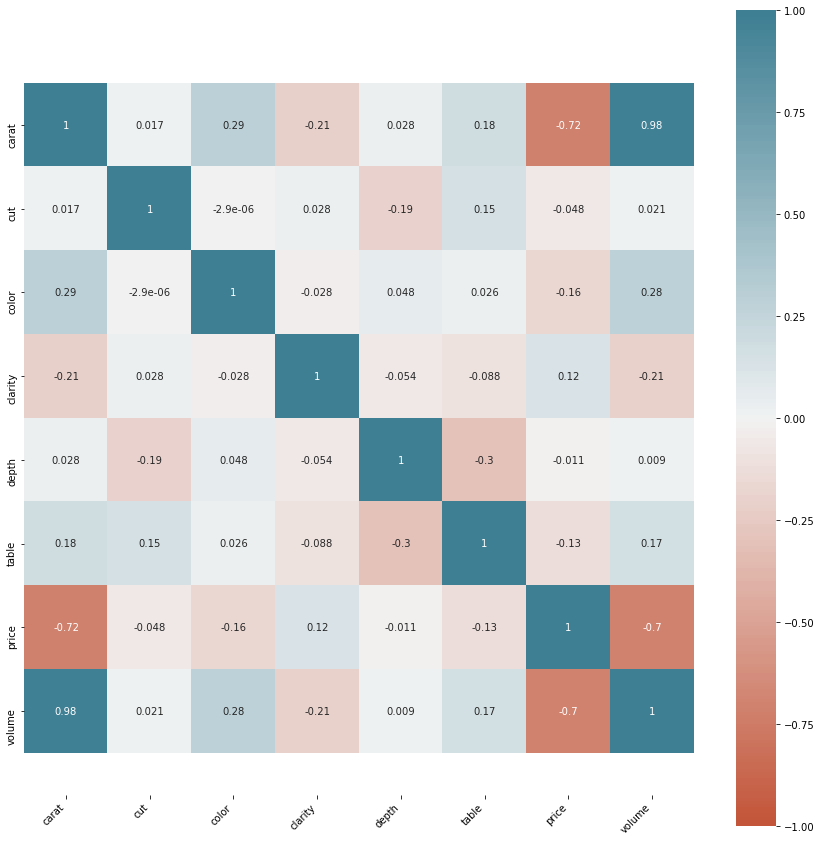

In [32]:
corr = df_raw.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylim(len(corr)+0.5, -0.5);


In [38]:
#Splitting dataset

df_raw = df_raw[["carat", "cut", "color", "clarity", "depth","table","volume","price"]]
X, y = df_raw.iloc[: , :-1], df_raw.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [41]:
decisionTree = DecisionTreeClassifier(max_depth=10, random_state=42)
decisionTree.fit(X_train,y_train)
print("Accuracy of train:",decisionTree.score(X_train,y_train))
print("Accuracy of test:",decisionTree.score(X_test,y_test))

Accuracy of train: 0.9425676576456472
Accuracy of test: 0.9234789100410601


In [45]:
#Decision Tree
predict = decisionTree.predict(X_test)
print("Precision = {}".format(precision_score(y_test, predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))
print("F1 Score = {}".format(f1_score(y_test, predict,average='macro')))

Precision = 0.8095314113345111
Recall = 0.8212354326155535
Accuracy = 0.9234789100410601
F1 Score = 0.8139973897556321


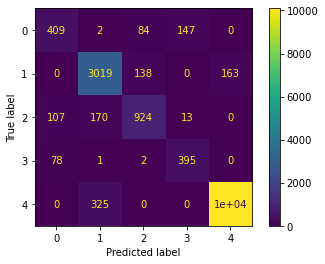

In [51]:
plot_confusion_matrix(decisionTree, X_test, y_test)
plt.show()

In [54]:
#XGBOOST 
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1],
    'n_estimators': [10,190,200]
    
}
xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = RandomizedSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

/Users/ezgicug/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1}
Mean of the cv scores is 0.933635
Train Score 0.980056
Test Score 0.938348
Seconds used for refitting the best model on the train dataset: 13.403784


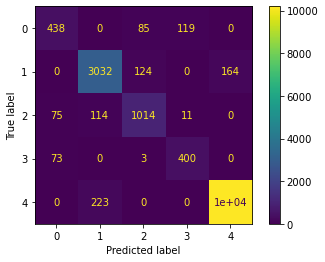

In [55]:
pred = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test)
plt.show()


In [56]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
print("\nClassification report for Naive Bayes: \n", classification_report(y_test, pred))


Precision = 0.8426763946743305
Recall = 0.8499380893288123
Accuracy = 0.938347642155033
F1 Score = 0.8455350070883236

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       642
           1       0.90      0.91      0.91      3320
           2       0.83      0.84      0.83      1214
           3       0.75      0.84      0.80       476
           4       0.98      0.98      0.98     10422

    accuracy                           0.94     16074
   macro avg       0.84      0.85      0.85     16074
weighted avg       0.94      0.94      0.94     16074



# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

I implemented decision tree algorithm, XGBoost algoritm.When we compare the results, best performing model is XGBoost with accuracy score(94%).A more detailed preprocessing may give us better results. :)